In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import matplotlib.pyplot as plt
import penn
import promonet
import torch


/home/mrm5248/conda/envs/env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
gpu = 0
dataset = 'vctk'
stem = '0036/000026-100'
prefix = f'/files10/max/promonet/data/cache/{dataset}/{stem}'
audio = promonet.load.audio(f'{prefix}.wav')
pitch, periodicity, loudness, ppg = promonet.preprocess.from_audio(audio, gpu=gpu)


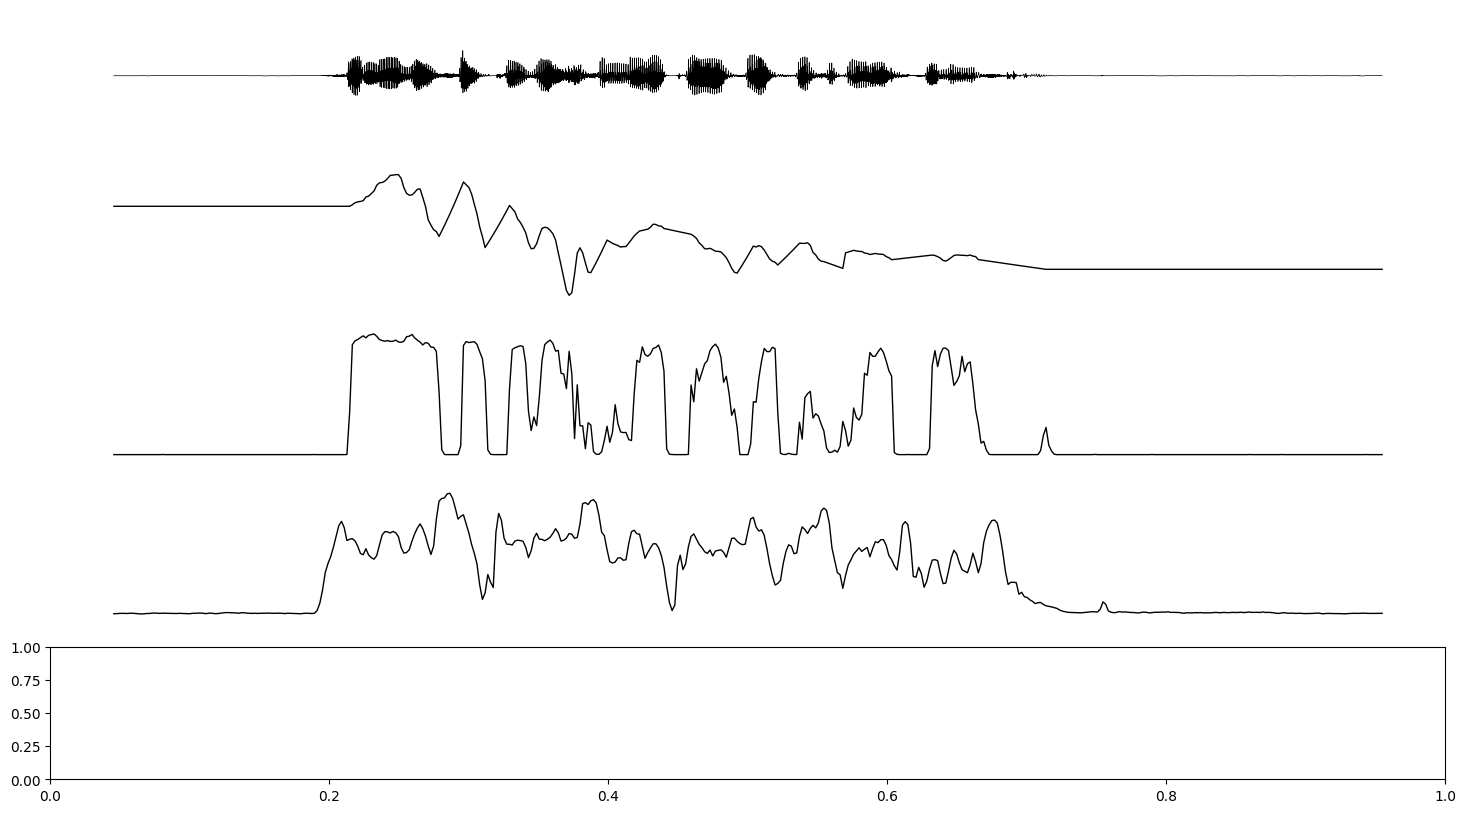

In [4]:
fig = promonet.plot.from_features(audio, pitch, periodicity, loudness, ppg)


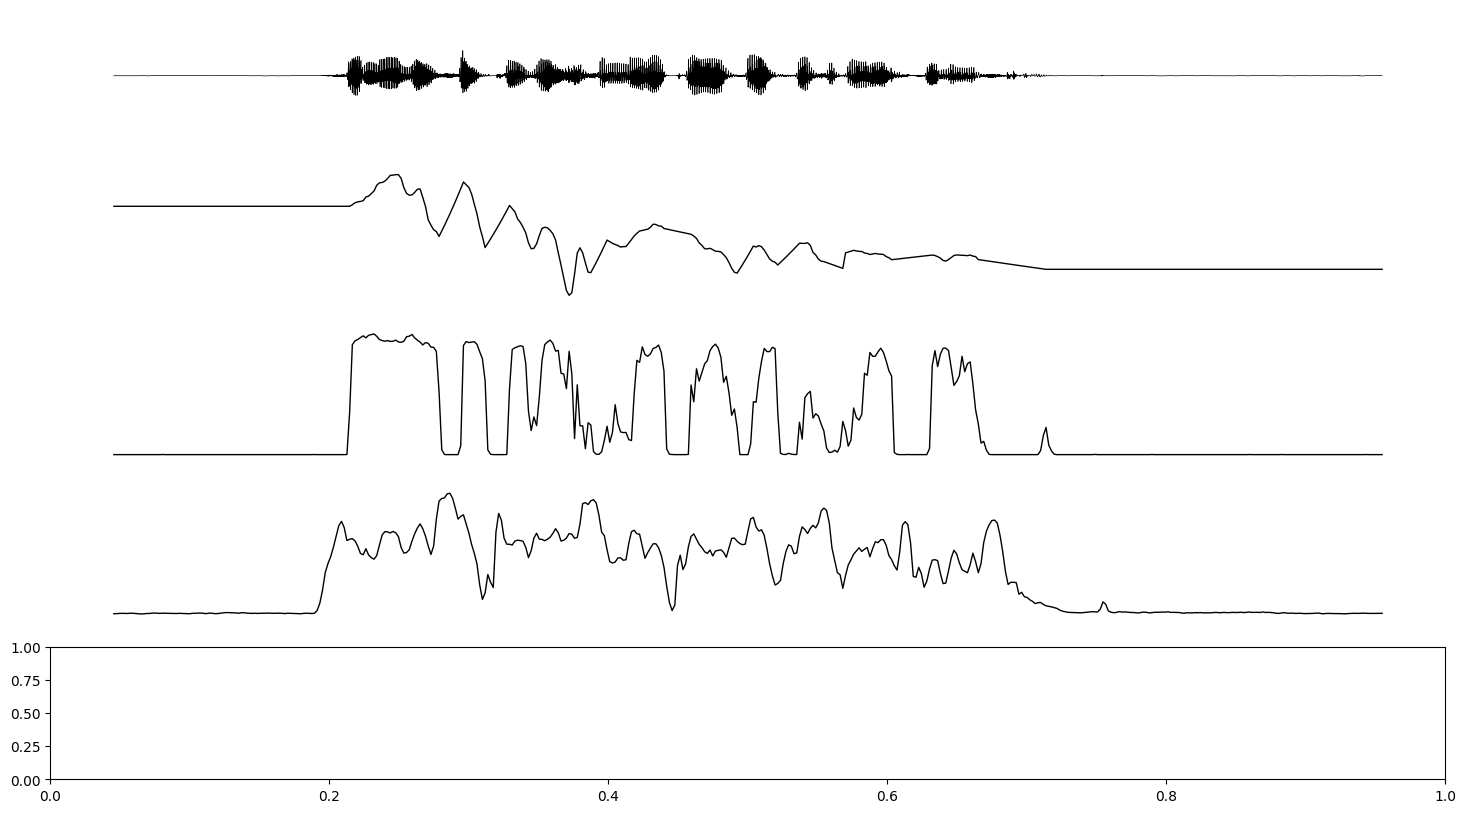

In [5]:
pi, pe = penn.from_audio(
        audio,
        sample_rate=promonet.SAMPLE_RATE,
        hopsize=promonet.convert.samples_to_seconds(promonet.HOPSIZE),
        fmin=promonet.FMIN,
        fmax=promonet.FMAX,
        batch_size=2048,
        center='half-hop',
        interp_unvoiced_at=promonet.VOICING_THRESOLD,
        gpu=gpu)
fig = promonet.plot.from_features(audio, pi, pe, loudness, ppg)


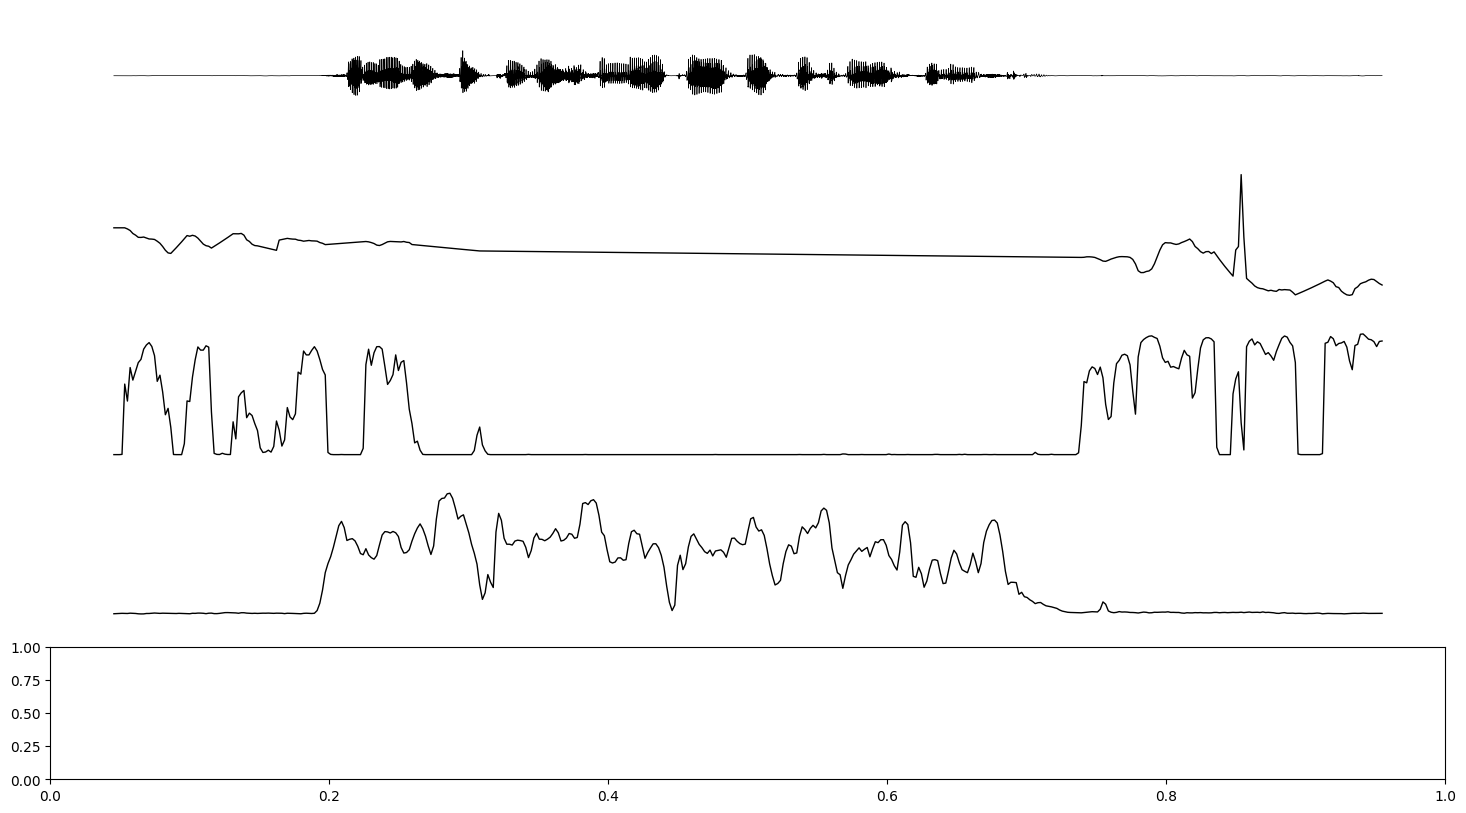

In [6]:
fig = promonet.plot.from_features(audio, *promonet.load.features(prefix))


In [14]:
# Get cache directory
directory = promonet.CACHE_DIR / 'vctk'

# Get text and audio files for this speaker
audio_files = sorted(list(directory.rglob('*.wav')))
audio_files = [file for file in audio_files if '-' in file.stem]
output_prefixes = [file.stem for file in audio_files]


In [8]:
numfiles = 250
penn.from_files_to_files(
    audio_files[:numfiles],
    output_prefixes[:numfiles],
    hopsize=promonet.convert.samples_to_seconds(promonet.HOPSIZE),
    fmin=promonet.FMIN,
    fmax=promonet.FMAX,
    batch_size=2048,
    center='half-hop',
    interp_unvoiced_at=promonet.VOICING_THRESOLD,
    gpu=gpu)


fcnf0++: 100%|██████████| 250/250 [00:05<00:00, 41.94it/s]


In [17]:
pi, pe = zip(*[
    penn.from_audio(
        promonet.load.audio(file),
        promonet.SAMPLE_RATE,
        hopsize=promonet.convert.samples_to_seconds(promonet.HOPSIZE),
        fmin=promonet.FMIN,
        fmax=promonet.FMAX,
        batch_size=2048,
        center='half-hop',
        interp_unvoiced_at=promonet.VOICING_THRESOLD,
        gpu=gpu)
    for file in audio_files[:numfiles]])
pi = torch.cat(pi, dim=1)
pe = torch.cat(pe, dim=1)
ca_pi = torch.cat([torch.load(file.parent / f'{file.stem}-pitch.pt') for file in audio_files[:numfiles]], dim=1)
ca_pe = torch.cat([torch.load(file.parent / f'{file.stem}-periodicity.pt') for file in audio_files[:numfiles]], dim=1)


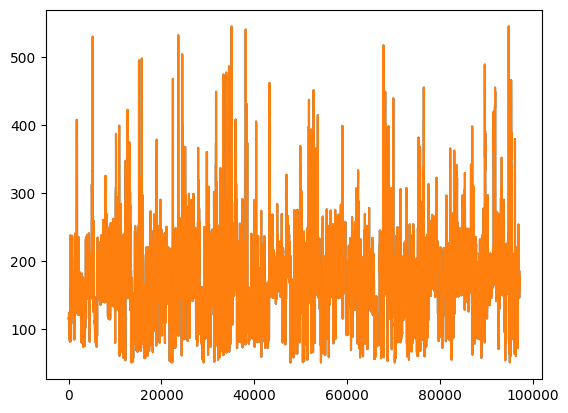

In [18]:

plt.plot(pi.squeeze().cpu())[:1000]
plt.plot(ca_pi.squeeze())[:1000]
